In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [81]:
ipl=pd.read_csv("IPL.csv")
ipl.head(6)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22
5,6,"March 30,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Kolkata,Group,Banglore,Field,128,10,132,7,Banglore,Wickets,3,Wanindu Hasaranga,Sherfane Rutherford,28,Wanindu Hasaranga,4--20


In [82]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [83]:
print(f"Rows are {ipl.shape[0]} and Columns are {ipl.shape[1]}")


Rows are 74 and Columns are 20


In [84]:
ipl.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Punjab        7
Delhi         7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64


Text(0.5, 1.0, 'Most Match Won By Teams')

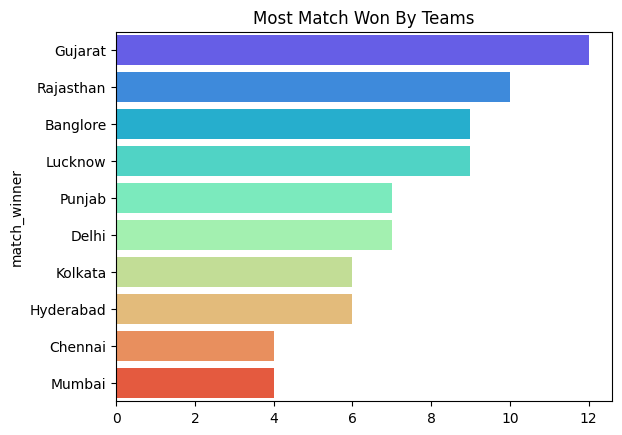

In [85]:
match_win=ipl['match_winner'].value_counts()
print(match_win)
sns.barplot(y = match_win.index, x = match_win.values, palette='rainbow')
plt.title('Most Match Won By Teams')

Text(0.5, 1.0, 'Toss Decision Trends')

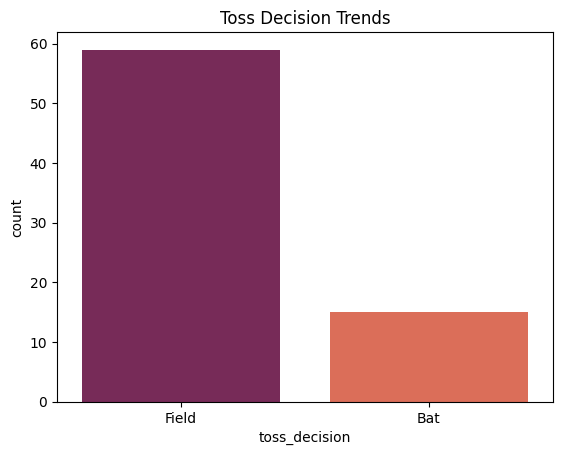

In [86]:
sns.countplot(x=ipl['toss_decision'], palette='rocket')
plt.title("Toss Decision Trends")

In [87]:
count=ipl[ipl['toss_winner']==ipl['match_winner']]['match_id'].count()
percentage=(count*100)/ipl.shape[0]
percentage.round(2)

np.float64(48.65)

Text(0.5, 1.0, 'Won by')

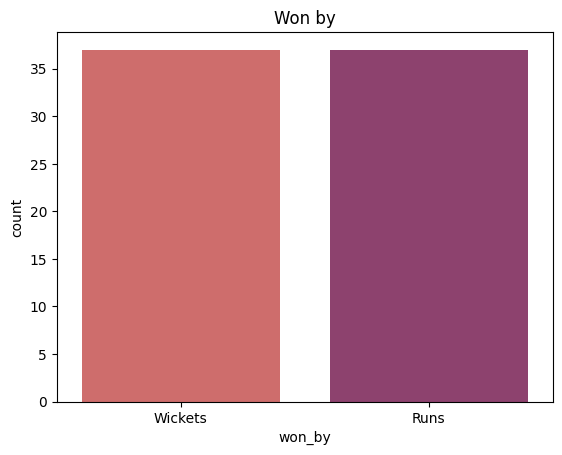

In [88]:
sns.countplot(x=ipl['won_by'], palette='flare')
plt.title('Won by')

In [89]:
count=ipl['player_of_the_match'].value_counts().head(10)
count

player_of_the_match
Kuldeep Yadav        4
Jos Buttler          3
Wanindu Hasaranga    2
Umesh Yadav          2
Quinton de Kock      2
Shubman Gill         2
Avesh Khan           2
Dinesh Karthik       2
Hardik Pandya        2
Rahul Tripathi       2
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10')

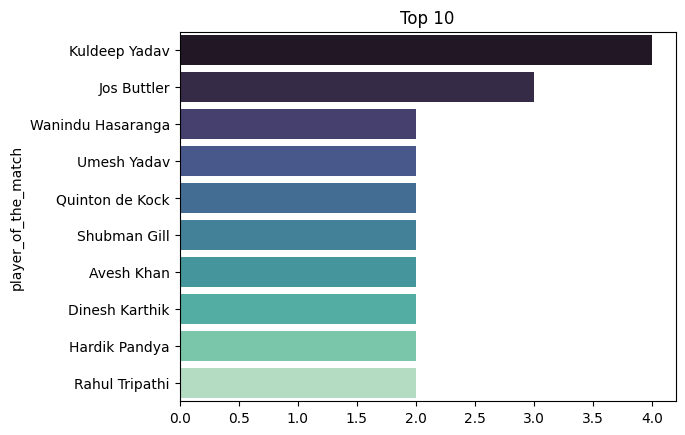

In [90]:
sns.barplot(x=count.values,y=count.index, palette='mako')
plt.title('Top 10')

In [91]:
high=ipl.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(6)
high

top_scorer
Jos Buttler         651
Quinton de Kock     377
KL Rahul            351
Shubman Gill        288
Faf du Plessis      257
Liam Livingstone    239
Name: highscore, dtype: int64

<Axes: ylabel='top_scorer'>

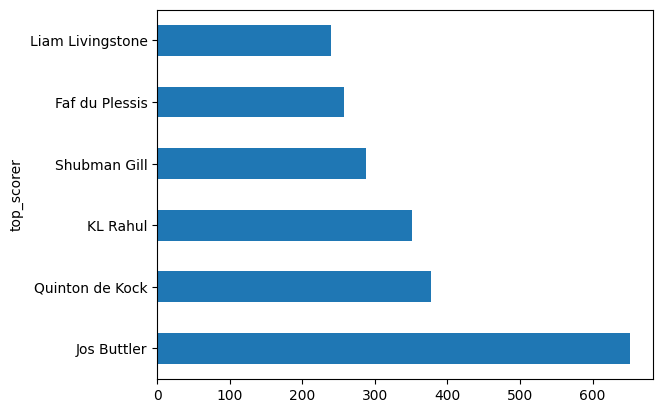

In [92]:
high.plot(kind='barh')

best_bowling
Avesh Khan         10
Andre Russell       7
Daniel Sams         7
Dwayne Bravo        6
Chetan Sakariya     2
Axar Patel          2
Name: highest_wickets, dtype: int64


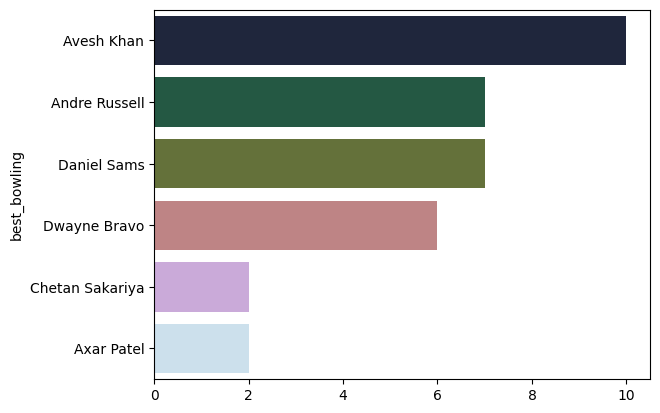

In [93]:
ipl['highest_wickets']=ipl['best_bowling_figure'].apply(lambda x :x.split('--')[0])
ipl['highest_wickets']=ipl['highest_wickets'].astype(int)
bowlers=ipl.groupby('best_bowling')['highest_wickets'].sum().head(6).sort_values(ascending=False)
sns.barplot(y=bowlers.index,x=bowlers.values, palette='cubehelix')
print(bowlers)

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64


<Axes: ylabel='venue'>

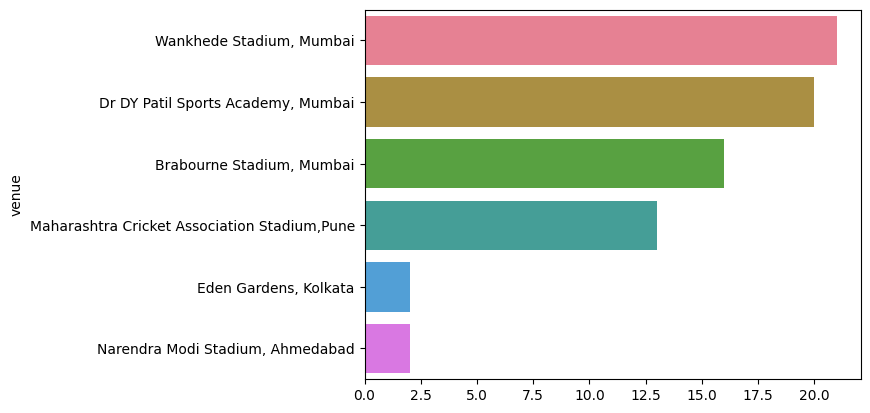

In [94]:
venue_count=ipl['venue'].value_counts()
print(venue_count)
sns.barplot(x=venue_count.values,y=venue_count.index,palette='husl')

In [95]:
ipl[ipl['won_by']=='Runs'].sort_values(by='margin', ascending=False).head(6)[['match_winner','margin']]

,match_winner,margin
54,Chennai,91
52,Lucknow,75
53,Banglore,67
56,Gujarat,62
4,Rajasthan,61
60,Kolkata,54


In [96]:
ipl[ipl['highscore']==ipl['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


In [97]:
ipl[ipl['highest_wickets']==ipl['highest_wickets'].max()][['best_bowling','best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
